In [1]:
import dgl
from dgl import save_graphs, load_graphs
from dgl.data.utils import makedirs, save_info, load_info

In [3]:
import pandas as pd
from glob import glob
import numpy as np
from torch import tensor
import torch
import re
import csv
import sys
import os
import torch as th
import matplotlib.pyplot as plt

In [4]:
file = '~/Downloads/0229981-230224095556074.csv'  ## file location, gbif Solanacea

colnames = ['gbifID','occurrenceID','verbatimScientificName','verbatimScientificNameAuthorship','locality',
            'occurrenceStatus','decimalLatitude','decimalLongitude','day','month','year','basisOfRecord',
            'collectionCode','catalogNumber','recordNumber','dateIdentified','recordedBy','identifiedBy',
            'typeStatus','lastInterpreted','issue','stateProvince','taxonKey','institutionCode','countryCode']

In [5]:
# Loads 10000 raw data samples (for demo only)
gbif_sample = pd.read_csv(file,nrows=10000,encoding='utf-8',sep='\\t',usecols=colnames,on_bad_lines='skip',engine='python')
gbif_columns = gbif_sample.columns.tolist()   ## load content into list
gbif_sample.head() # Print the head of the "Specimen"

,gbifID,occurrenceID,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,decimalLatitude,decimalLongitude,...,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,recordedBy,typeStatus,lastInterpreted,issue
0,14507359,NaN,Physalis alkekengi L.,NaN,FR,LAROCHE-SAINT-CYDROINE,NaN,PRESENT,47.9757,3.470130,...,Conservatoire botanique national du Bassin par...,Conservatoire botanique national du Bassin par...,20010122165146por,NaN,NaN,NaN,NaN,NaN,2023-05-09T00:56:41.255Z,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
1,21516372,NaN,Solanum dulcamara L.,NaN,FR,Chateaudun,NaN,PRESENT,48.0761,1.324440,...,Conservatoire botanique national du Bassin par...,Conservatoire botanique national du Bassin par...,20030902144741Per,NaN,NaN,NaN,Lebreton Alexis,NaN,2023-05-09T00:56:30.181Z,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
2,14517827,NaN,Physalis alkekengi L.,NaN,FR,VRIGNE-AUX-BOIS,NaN,PRESENT,NaN,NaN,...,Conservatoire botanique national du Bassin par...,Conservatoire botanique national du Bassin par...,20040203153749Per,NaN,NaN,NaN,Jame,NaN,2023-05-09T00:56:47.180Z,INSTITUTION_MATCH_NONE
3,10592424,NaN,Datura stramonium L.,NaN,FR,Sedan,NaN,PRESENT,NaN,NaN,...,Conservatoire botanique national du Bassin par...,Conservatoire botanique national du Bassin par...,20040203155458Per,NaN,NaN,NaN,Jame,NaN,2023-05-09T00:56:28.047Z,INSTITUTION_MATCH_NONE
4,21475075,NaN,Solanum dulcamara L.,NaN,FR,PREUILLY-SUR-CLAISE,NaN,PRESENT,46.8546,0.928775,...,Conservatoire botanique national du Bassin par...,Conservatoire botanique national du Bassin par...,19971126113009ref,NaN,NaN,NaN,Gaume Raymond,NaN,2023-05-09T00:56:42.507Z,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...


In [ ]:
# For large file, use chunks to load data
'''
GBIF Occurrence Download - 105,738,391 specimen records.
DOI: https://doi.org/10.15468/dl.5qqpak
'''
gbif_sample = pd.read_csv(file,chunksize=10000,encoding='utf-8',sep='\\t',usecols=colnames,on_bad_lines='skip',engine='python')
gbif_sample = pd.concat(gbif_sample)

In [6]:
# A statistical analysis helper function 
def get_gbif_distribution(data):
    sum_count = 0
    data_distribution = {} ## a dictionary to store the distribution of individual entity
    data_distribution_sum = pd.DataFrame(columns = gbif_columns, index=['sum'])
    for (columnName, columnData) in data.iteritems():
        temp = gbif_sample[columnName].value_counts()
        data_distribution.update({columnName: temp})
        data_distribution_sum.at['sum', columnName]=sum(temp)
    return data_distribution, data_distribution_sum

                                    sum
gbifID                            10000
occurrenceID                       9598
verbatimScientificName            10000
verbatimScientificNameAuthorship   6405
countryCode                        8804
locality                           8248
stateProvince                      6054
occurrenceStatus                  10000
decimalLatitude                    3531
decimalLongitude                   3531
day                                6366
month                              7208
year                               7694
taxonKey                          10000
basisOfRecord                     10000
institutionCode                    9997
collectionCode                     9997
catalogNumber                     10000
recordNumber                       5430
identifiedBy                       4637
dateIdentified                     2822
recordedBy                         8764
typeStatus                          757
lastInterpreted                   10000


<AxesSubplot:>

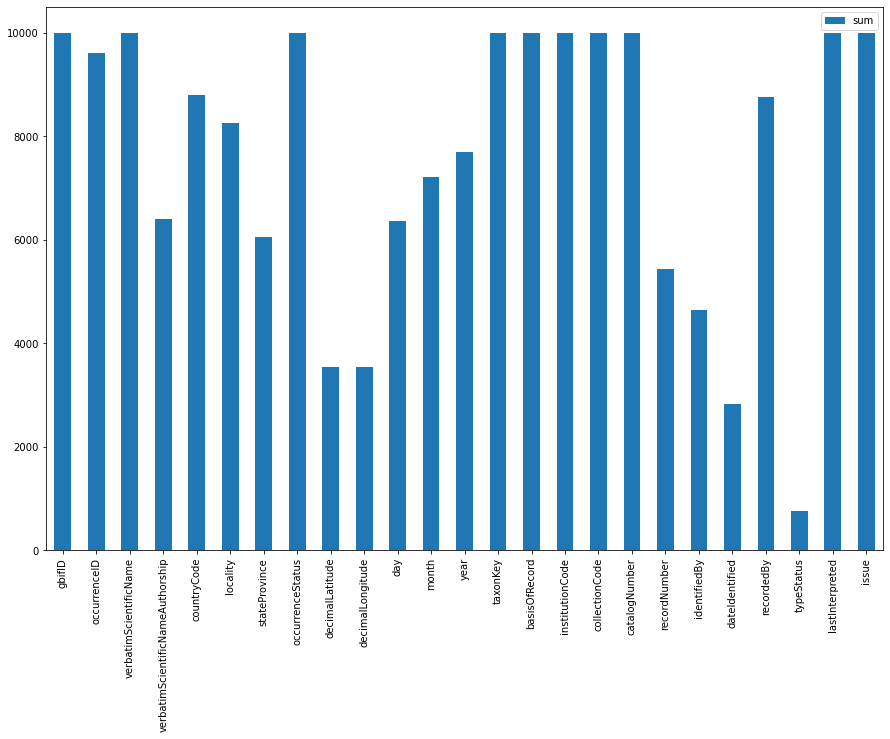

In [7]:
# Plot data distribution 
distribution, distribution_sum = get_gbif_distribution(gbif_sample)
print(distribution_sum.T)
distribution_sum.T.plot.bar(figsize=(15,10))